In [2]:
import numpy as np
from scipy.integrate import quad

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

# Create an integer messege vector b

b = np.array([3,6,7,2,5,2])

# create H here n = 6 d = 3 normalize H to get |det(G)| = |det(H)| = 1

H = np.array([[0, -0.8, 0, -0.5, 1, 0],[0.8, 0, 0, 1, 0, -0.5],[0, 0.5, 1, 0, 0.8, 0],[0, 0, -0.5, -0.8, 0, 1],[1, 0, 0, 0, 0.5, 0.8],[0.5, -1, -0.8, 0, 0, 0]])

H_norm = H/np.abs(np.linalg.det(H))**(1/6.)

# Calculate generator matrix G = inv(H) normalize H to get |det(G)| = 1

G = np.linalg.inv(H_norm)

# Calculate codeword x

x = np.dot(G,b)

x = x.reshape(-1,1)

# create noisy codeword y = x + w

mu, sigma = 0, 10 # mean and standard deviation
w = np.random.normal(mu, sigma, x.shape)
y = x + w

# x1, x2, x3, x4,...,xn -> variable node c1,c2,....,cn -> check node
# Initialization
# y is user input fingerprint
x_input = np.arange(-200.0,200.1,0.1)

In [4]:
y

array([[  83.15074767],
       [  63.91485009],
       [  -6.10220706],
       [-120.69462015],
       [ -26.93363402],
       [-115.36079836]])

In [1]:


def message(x,k):
    # y and sigma should be given
    # produces f_k^0(x)
    global y
    global sigma
    return (np.exp(-(((y[k] - x)/sigma)**2)/2.))/(np.sqrt(2*np.pi*sigma**2))

# Basic iteration

def conv(j,h_r,x):
    # assuming r is known
    # h_r is the elements of a row [0,-0.8,0,-0.5,1,0]
    # assuming h_r is known
    # provide the vector and put a condition != 0
    # i,l should be relabeled
    p_j = 1
    for i,p in enumerate (h_r[:j]):
        if p != 0:
            p_j = np.convolve(p_j,message(x/p,i),mode='full') # we need same mode
    for l,m in enumerate (h_r[j+1:]):
        if m != 0:
            p_j = np.convolve(p_j,message(x/m,l),mode='full')
    return p_j

    

def stretch(j,h_r,x):
    # The result is stretched by -h_j
    return conv(j,h_r,-h_r[j]*x)

def periodic_extension(j,h_r,x):
    #The result is extended to a periodic function with period 1/|hj |:
    end = 101
    i = -100
    q = 1
    while i < end:
        
        q += stretch(j, h_r , x  - i/h_r[j])
        i += 1
    return q
    
def product(j,h_r,k,x):
    
    # for a specific variable node x_k
    # e - column degree
    # l != j
    # h_r is the non-zero elements of a row
    factor = (np.exp(-(((y[k] - x)/sigma)**2)/2.))
    e = 6 # in this case
    q_l = 1
    l = 0
    while (l < j):
        if h_r[l] != 0:
            q_l *= periodic_extension(l,h_r,x)
        l += 1                
    l = j+1
    while (l < e):
        if h_r[l] != 0:
            q_l *= periodic_extension(l,h_r,x)
        l += 1
    q_l = q_l[1999:6000]
    return factor*q_l
    
def normalization(j,h_r,k,x):
    # sum of product
    #norm = quad(message,low,high,args = (k,))
    return product(j,h_r,k,x)/sum(product(j,h_r,k,x))
    #return  product(j,h_r,k,x)



In [31]:
49/.8

61.25

In [4]:
#print (conv(1,np.array([-0.8,-0.5,1])))
#print (messege(1,x))
    
    
#test = stretch(1,[-0.8,-0.5,1],x_input)
#nonzero = [e for e in test if e!= 0]

#print (len(nonzero),len(test))

period = periodic_extension(1,[0, -0.8, 0, -0.5, 1, 0],x_input)

print (len(period))


8001


In [33]:
norm = normalization(1,[0, -0.8, 0, -0.5, 1, 0],1,x_input)

#a = product(1,[0, -0.8, 0, -0.5, 1, 0],1,x_input)

In [9]:
np.rint(x_input.max() * )

100.0

In [21]:
h = np.abs([0, -0.8, 0, -0.5, 1, 0])
h[np.nonzero(h)]

array([0.8, 0.5, 1. ])

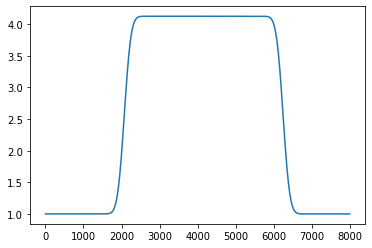

In [5]:
plt.plot(np.arange(len(period)),period);
#plt.ylim(3.1248,3.12505);

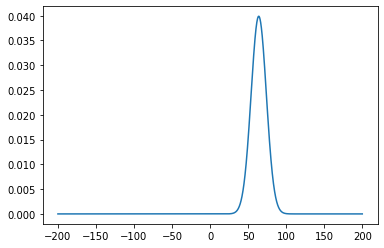

In [7]:
#plt.plot(x_input,norm);
plt.plot(x_input,message(x_input,1));

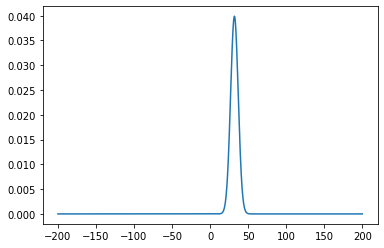

In [22]:
plt.plot(x_input,message(x_input/0.5,1));

#### Conv mode should be same, otherwise we cannot multiply messege vector
#### l = 1

In [ ]:
plt.plot(np.arange(len(conv(3,np.array([0, -0.8, 0, -0.5, 1, 0]),x_input))),conv(3,np.array([0, -0.8, 0, -0.5, 1, 0]),x_input));

In [ ]:
plt.plot(np.arange(len(stretch(1,np.array([0, -0.8, 0, -0.5, 1, 0]),x_input))),stretch(1,np.array([0, -0.8, 0, -0.5, 1, 0]),x_input));

In [ ]:
per_1 = stretch(1,np.array([0, -0.8, 0, -0.5, 1, 0]),x_input + 1/1)
per_2 = stretch(1,np.array([0, -0.8, 0, -0.5, 1, 0]),x_input + 50/1)
per_3 = stretch(1,np.array([0, -0.8, 0, -0.5, 1, 0]),x_input - 50/1)

In [ ]:
plt.plot(np.arange(len(per_1)),per_1);

In [ ]:
plt.plot(np.arange(len(per_2)),per_2+per_1+per_3);

In [ ]:
h_1 = np.array([0, -0.8, 0, -0.5, 1, 0])

In [ ]:
h_1[:2]

In [ ]:
h_1[3:]

In [ ]:
len(np.arange(-200,200,0.1))

In [15]:
np.unique(H.sum(0))

array([-1.3, -0.3,  1.3,  2.3])

In [16]:
 np.unique(H.sum(1))

array([-1.3, -0.3,  1.3,  2.3])

In [18]:
H.nonzero()

(array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]),
 array([1, 3, 4, 0, 3, 5, 1, 2, 4, 2, 3, 5, 0, 4, 5, 0, 1, 2]))

In [19]:
H

array([[ 0. , -0.8,  0. , -0.5,  1. ,  0. ],
       [ 0.8,  0. ,  0. ,  1. ,  0. , -0.5],
       [ 0. ,  0.5,  1. ,  0. ,  0.8,  0. ],
       [ 0. ,  0. , -0.5, -0.8,  0. ,  1. ],
       [ 1. ,  0. ,  0. ,  0. ,  0.5,  0.8],
       [ 0.5, -1. , -0.8,  0. ,  0. ,  0. ]])